ÏÇºÏÑ± Ï£ºÏãù Í∞ÄÍ≤© ÏòàÏ∏°

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

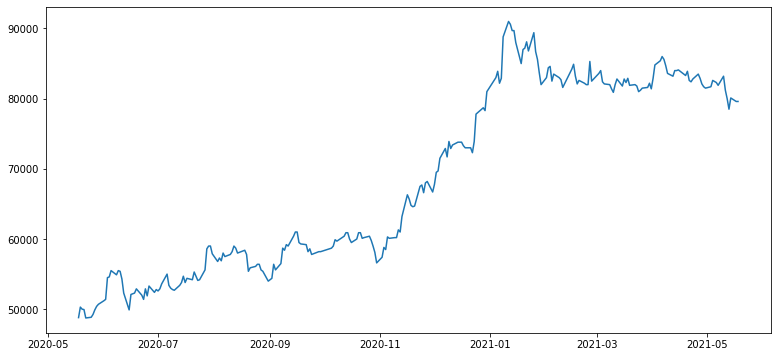

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 13, 6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

plt.plot(ts)

In [3]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 


Series([], Name: Close, dtype: float64)

In [4]:
ts_log = np.log(ts)

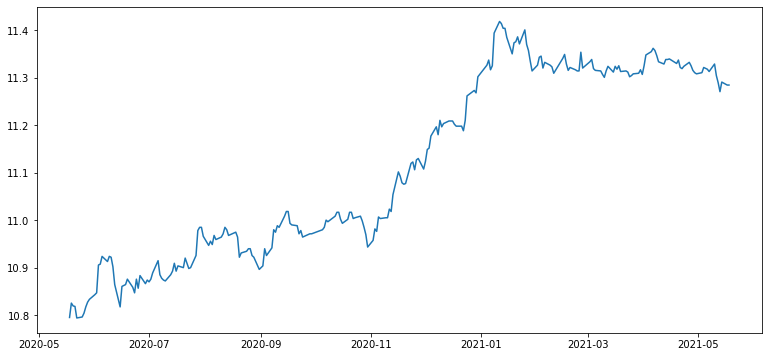

In [5]:
plt.plot(ts_log)

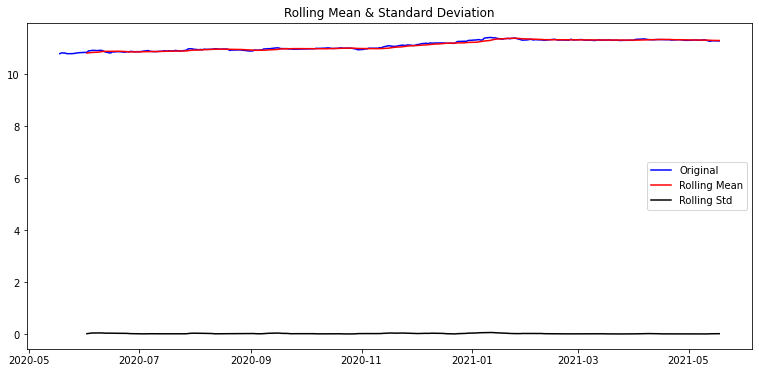

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


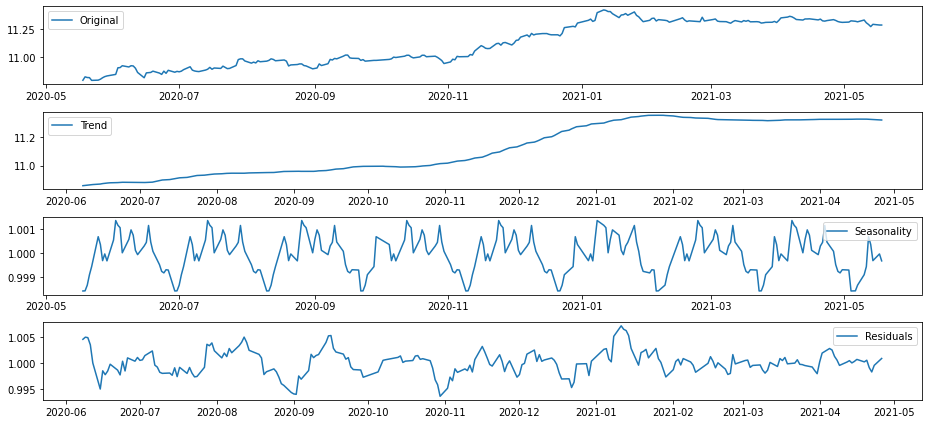

In [6]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÑúÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [7]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


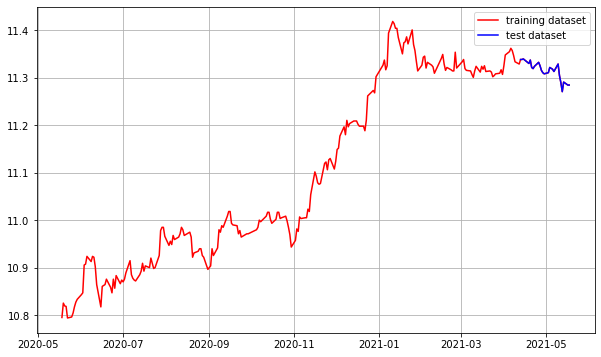

In [8]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


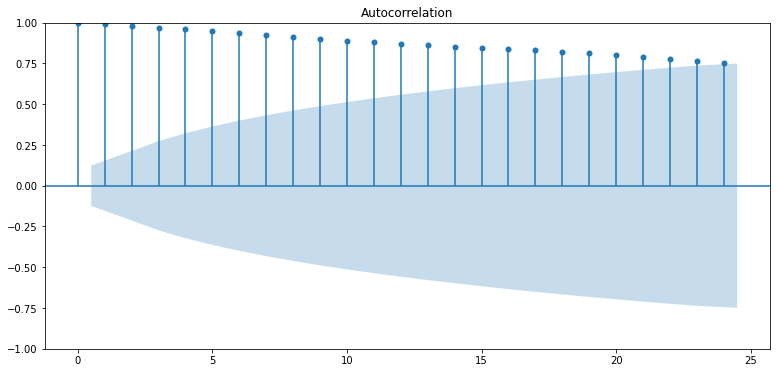

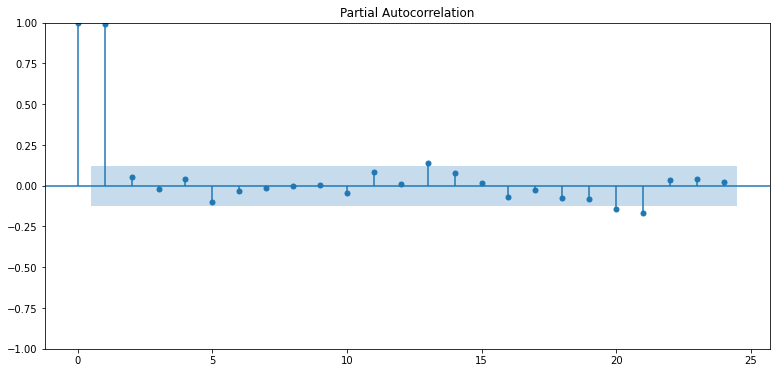

In [9]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()


Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


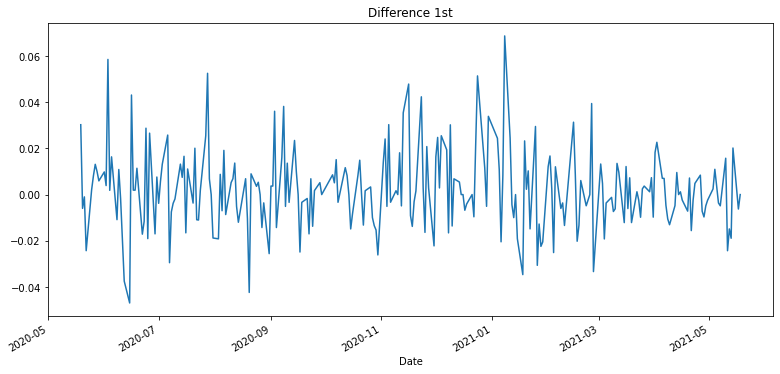

In [10]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)


In [11]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Thu, 17 Feb 2022   AIC                          -1156.722
Time:                        14:42:54   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


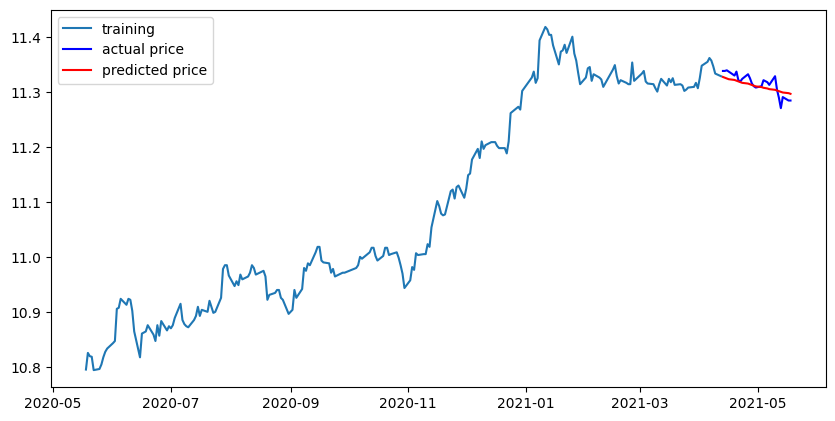

In [12]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1048973.6014239907
MAE:  843.7579531508708
RMSE:  1024.19412292006
MAPE: 1.03%


___

apple Ï£ºÏãù Í∞ÄÍ≤© ÏòàÏ∏°

In [14]:
apple_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/apple.csv'
apple_df = pd.read_csv(apple_filepath, index_col='Date', parse_dates=True)
apple_ts = apple_df['Close']

apple_ts.head()

Date
2021-02-17    130.839996
2021-02-18    129.710007
2021-02-19    129.869995
2021-02-22    126.000000
2021-02-23    125.860001
Name: Close, dtype: float64

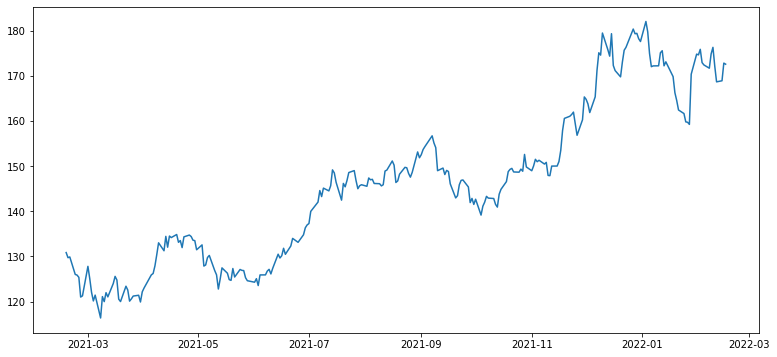

In [15]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    

plt.plot(apple_ts)

In [16]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
apple_ts = apple_ts.interpolate(method='time')
apple_ts[apple_ts.isna()] 

Series([], Name: Close, dtype: float64)

In [17]:
apple_log = np.log(apple_ts)

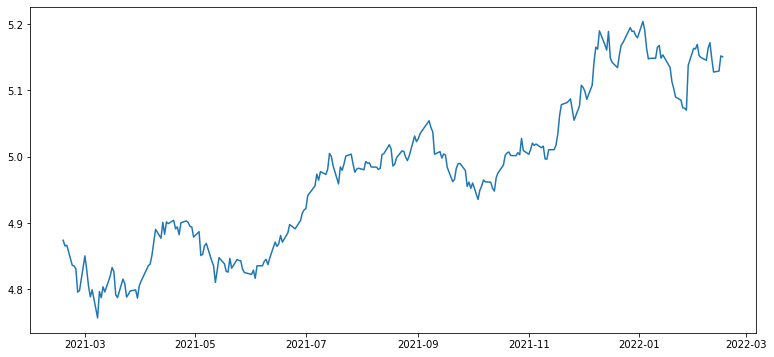

In [18]:
plt.plot(apple_log)

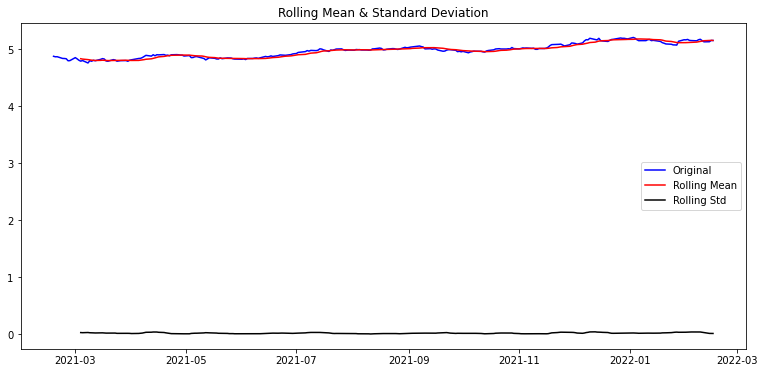

Results of Dickey-Fuller Test:
Test Statistic                  -0.690251
p-value                          0.849259
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


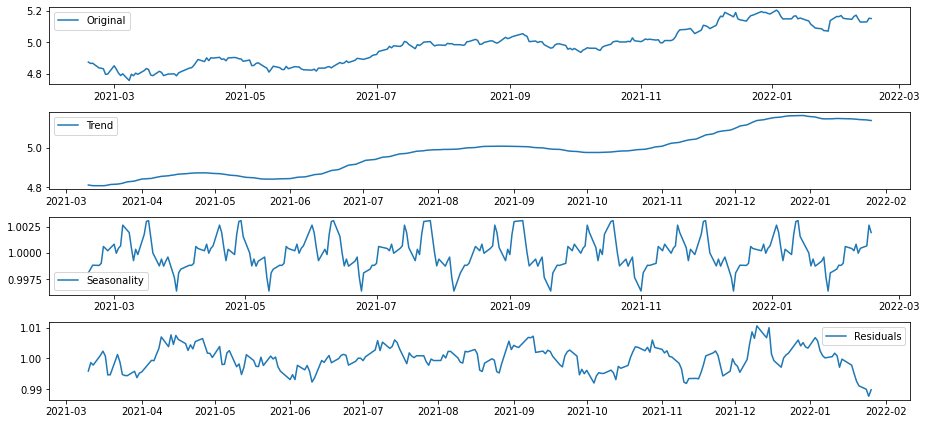

In [19]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(apple_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(apple_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(apple_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(apple_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [20]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.449081
p-value                          0.000243
#Lags Used                       6.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.573919
dtype: float64


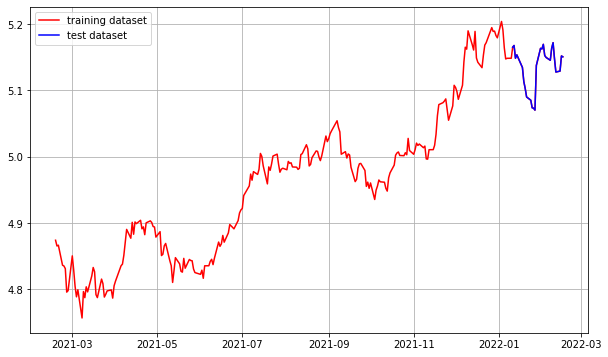

In [21]:
train_data, test_data = apple_log[:int(len(apple_log)*0.9)], apple_log[int(len(apple_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(apple_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


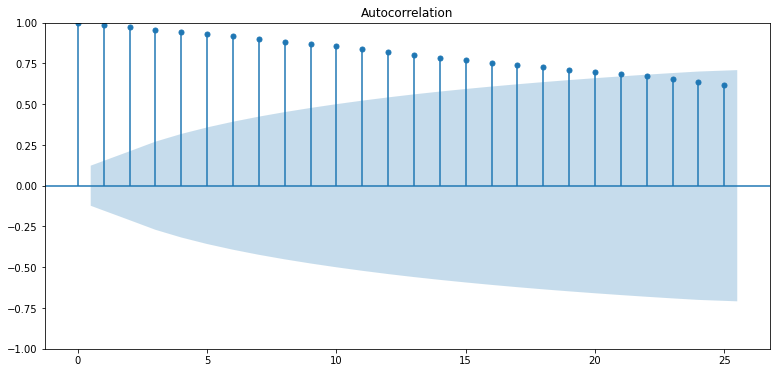

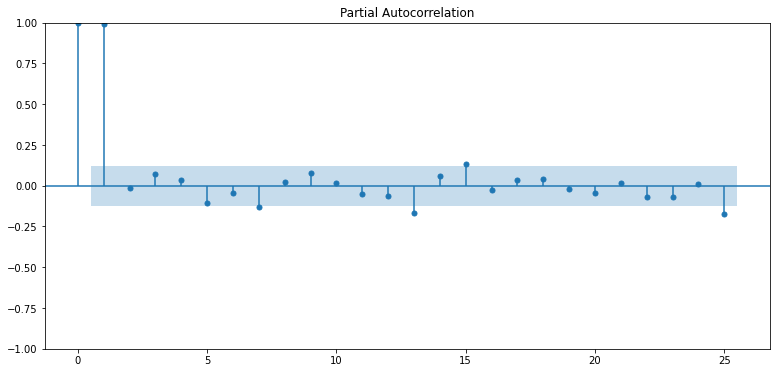

In [22]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(apple_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(apple_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.613159e+01
p-value                        4.778989e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64


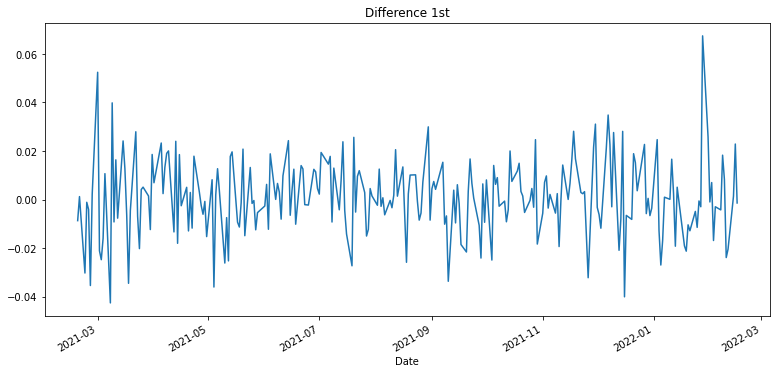

In [23]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = apple_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [24]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 628.317
Date:                Thu, 17 Feb 2022   AIC                          -1252.633
Time:                        14:42:57   BIC                          -1245.784
Sample:                             0   HQIC                         -1249.869
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0637      0.063     -1.004      0.316      -0.188       0.061
sigma2         0.0002   1.98e-05     11.682      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.02   Jarque-

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


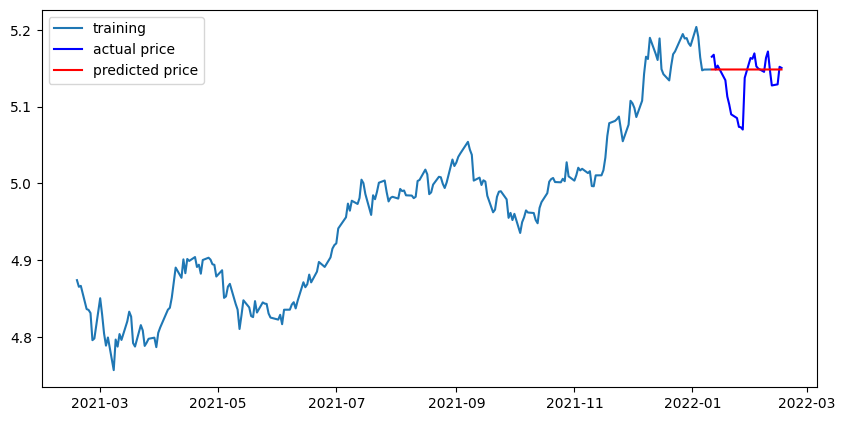

In [25]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  34.00506490940173
MAE:  4.151925684330013
RMSE:  5.831386191069987
MAPE: 2.51%


___

meta Ï£ºÏãù Í∞ÄÍ≤© ÏòàÏ∏°

In [27]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/meta.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-17    225.350006
2021-02-18    222.399994
2021-02-19    216.199997
2021-02-22    214.949997
2021-02-23    216.500000
Name: Close, dtype: float64

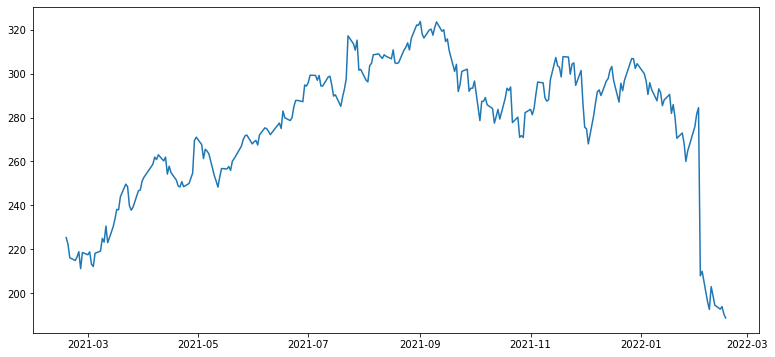

In [28]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 13, 6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

plt.plot(ts)

In [29]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 


Series([], Name: Close, dtype: float64)

In [30]:
ts_log = np.log(ts)

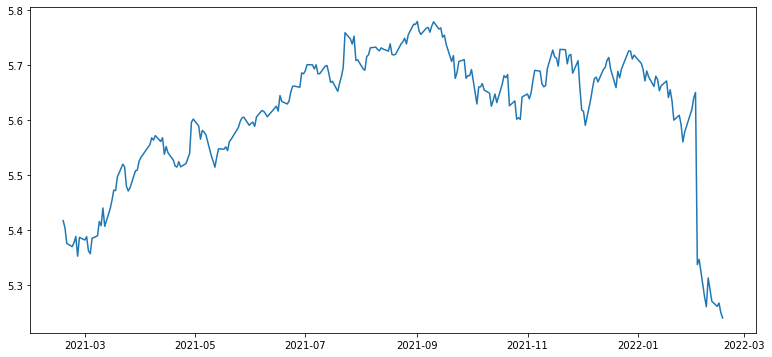

In [31]:
plt.plot(ts_log)

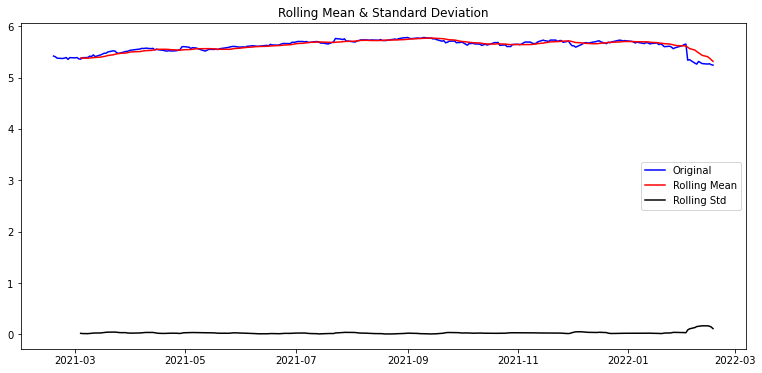

Results of Dickey-Fuller Test:
Test Statistic                  -0.885283
p-value                          0.792780
#Lags Used                       0.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


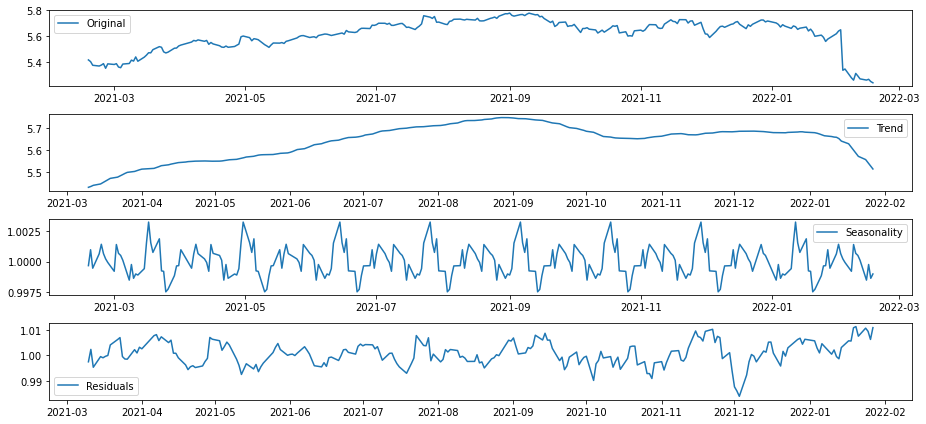

In [32]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [33]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.347774
p-value                          0.000004
#Lags Used                       3.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


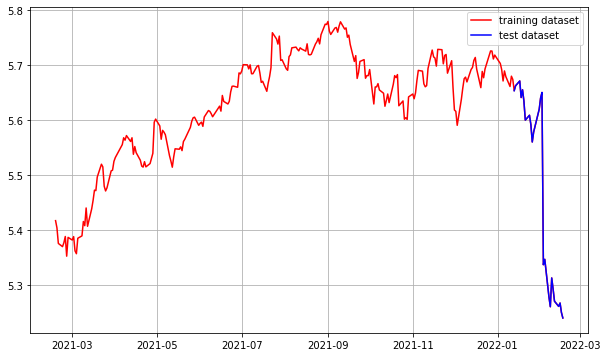

In [34]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset') 
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


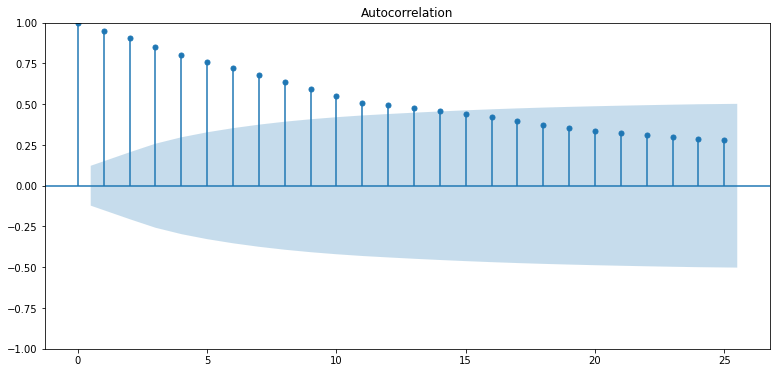

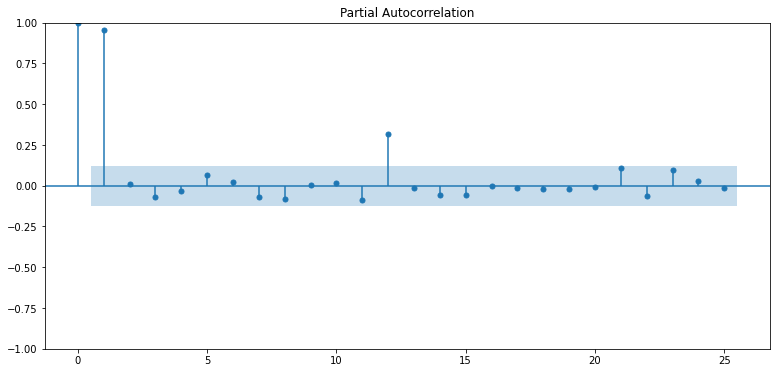

In [35]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()


Results of Dickey-Fuller Test:
Test Statistic                -8.941924e+00
p-value                        9.203866e-15
#Lags Used                     3.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64


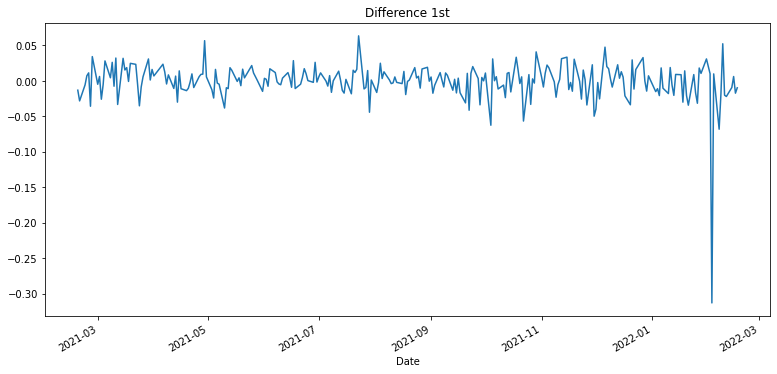

In [36]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)


In [37]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 2, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  231
Model:                ARIMA(14, 2, 0)   Log Likelihood                 581.334
Date:                Thu, 17 Feb 2022   AIC                          -1132.668
Time:                        14:43:01   BIC                          -1081.162
Sample:                             0   HQIC                         -1111.889
                                - 231                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0001      0.071    -14.186      0.000      -1.138      -0.862
ar.L2         -0.8530      0.108     -7.891      0.000      -1.065      -0.641
ar.L3         -0.8485      0.117     -7.236      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


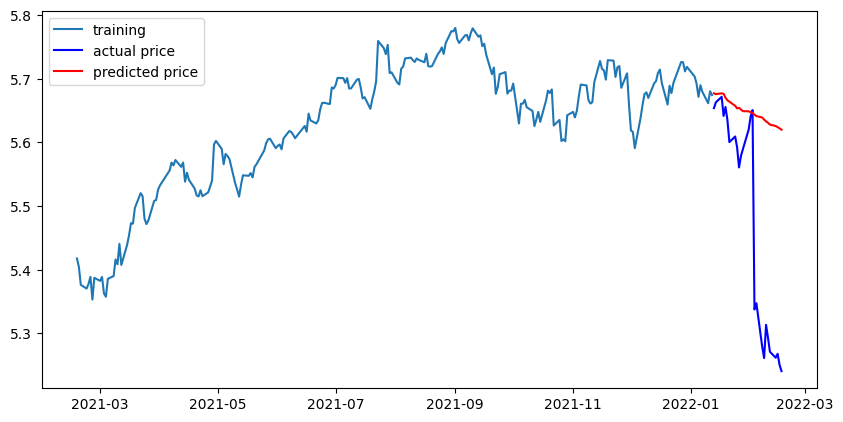

In [38]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  2932.0473199417393
MAE:  40.60702686211336
RMSE:  54.14838243144239
MAPE: 19.81%


___

netflix Ï£ºÏãù Í∞ÄÍ≤© ÏòàÏ∏°

In [40]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/netflix.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-17    551.340027
2021-02-18    548.219971
2021-02-19    540.219971
2021-02-22    533.780029
2021-02-23    546.150024
Name: Close, dtype: float64

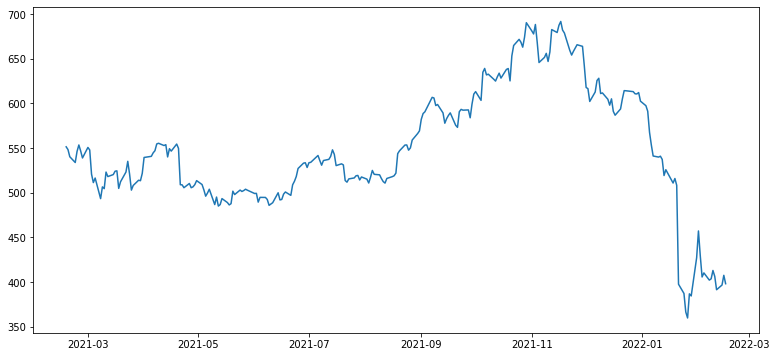

In [41]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 13, 6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

plt.plot(ts)

In [42]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 


Series([], Name: Close, dtype: float64)

In [43]:
ts_log = np.log(ts)

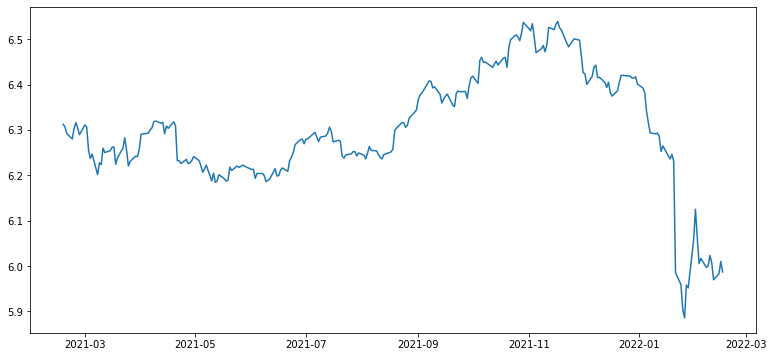

In [44]:
plt.plot(ts_log)

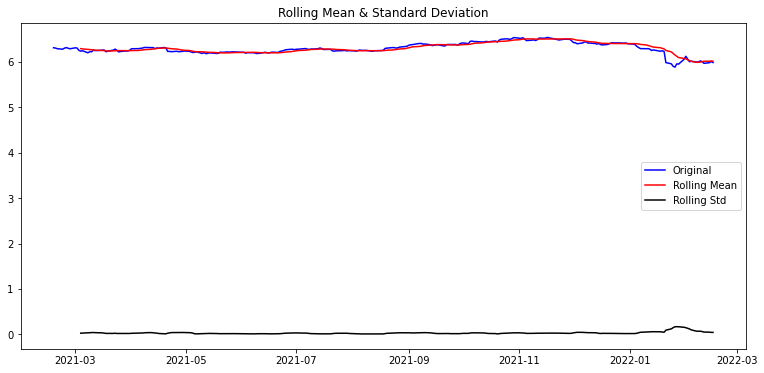

Results of Dickey-Fuller Test:
Test Statistic                  -0.614173
p-value                          0.867747
#Lags Used                       4.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


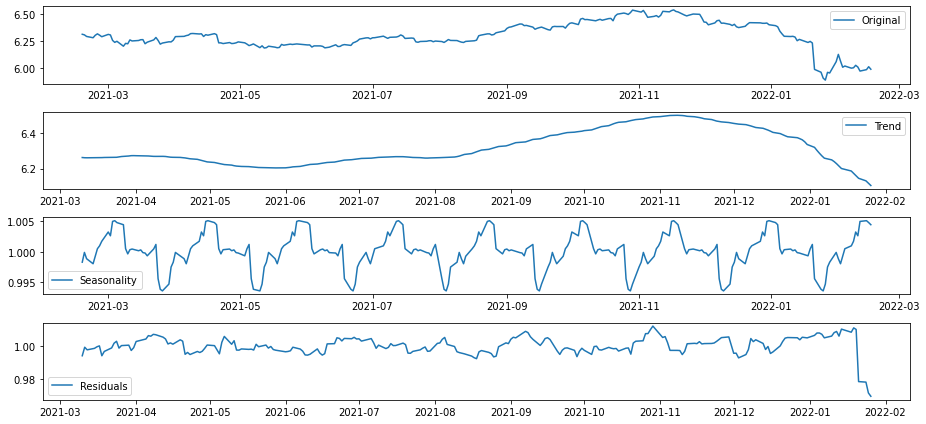

In [45]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [46]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.411351
p-value                          0.000283
#Lags Used                       9.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


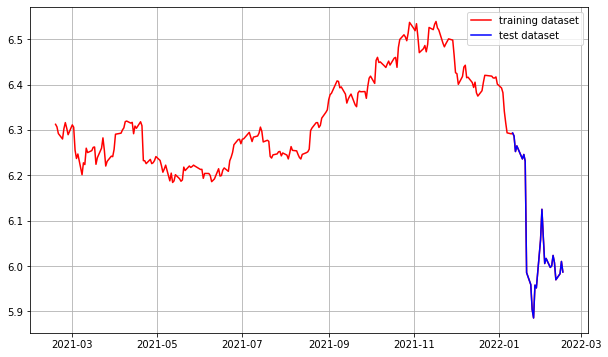

In [47]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


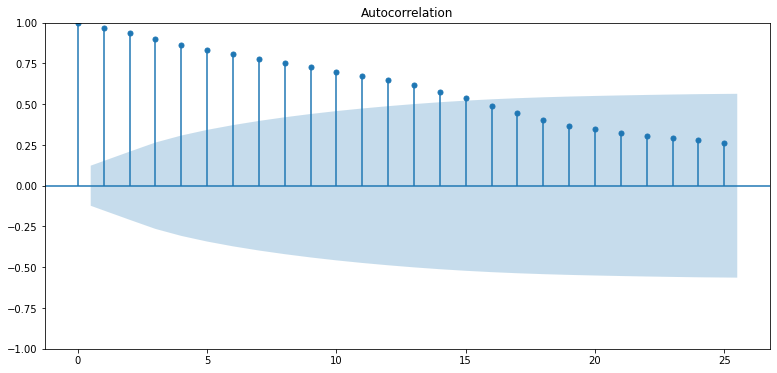

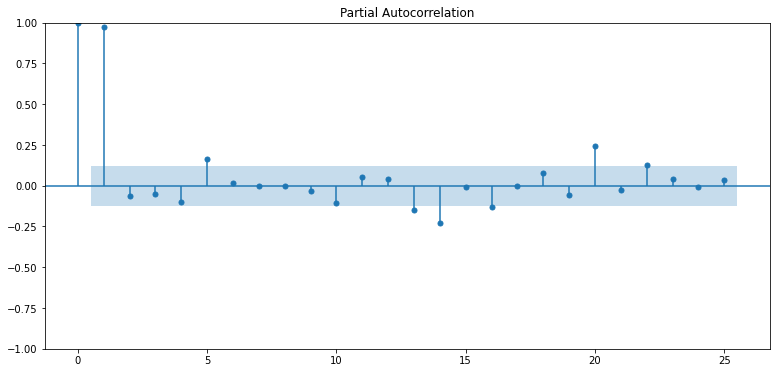

In [48]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()


Results of Dickey-Fuller Test:
Test Statistic                -8.699931e+00
p-value                        3.833695e-14
#Lags Used                     3.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


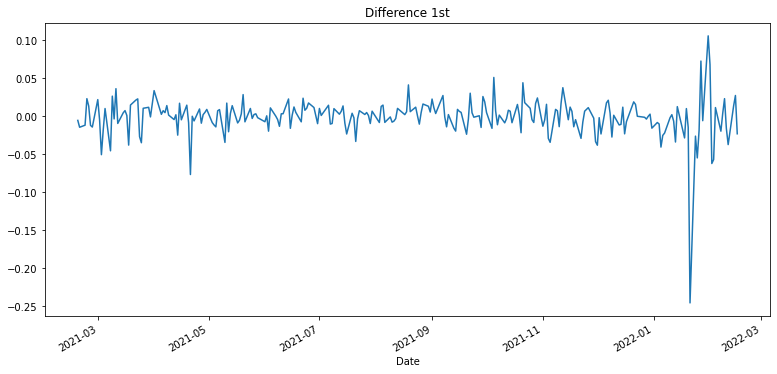

In [49]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)


In [50]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 2, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                ARIMA(14, 2, 0)   Log Likelihood                 599.593
Date:                Thu, 17 Feb 2022   AIC                          -1169.185
Time:                        14:43:04   BIC                          -1117.877
Sample:                             0   HQIC                         -1148.479
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8656      0.072    -12.080      0.000      -1.006      -0.725
ar.L2         -0.8783      0.105     -8.359      0.000      -1.084      -0.672
ar.L3         -0.7699      0.125     -6.167      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


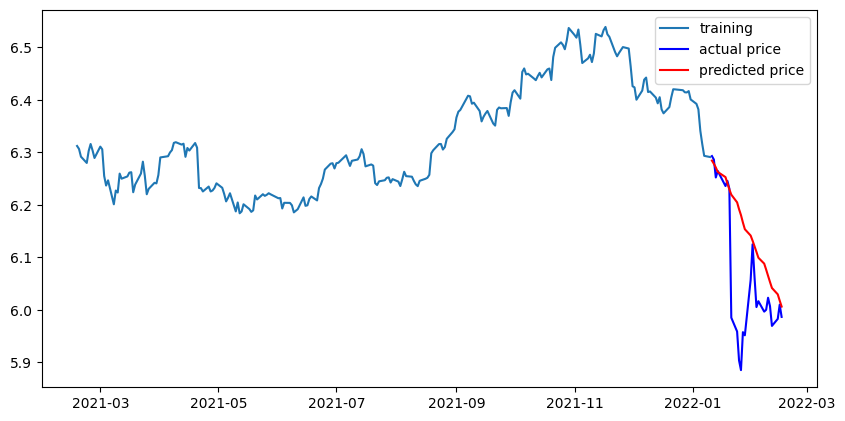

In [51]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  3019.41105221661
MAE:  37.7198409149172
RMSE:  54.94916789375986
MAPE: 9.64%


___

ü§î ÌöåÍ≥†

1. ÍµâÏû•Ìûà Ïûò ÏßúÏó¨ÏßÑ Î™®Îç∏Ïù∏ Í≤É Í∞ôÎã§. Îç∞Ïù¥ÌÑ∞Î•º Î∞îÍøî ÎÑ£Ïñ¥Î¥êÎèÑ ÍΩ§ ÏòàÏ∏°ÏùÑ Ïûò Ìï¥ÎÇ∏Îã§.

2. Îã§Îßå Î©îÌÉÄÏùò Ïñ¥ÎßàÎ¨¥ÏãúÌïú ÌïòÎùΩÏùÄ Î™®Îç∏ÎèÑ ÏòàÏ∏°ÌïòÏßÄ Î™ªÌïúÎã§...

3. ARIMA Î™®Îç∏ÏùÑ Ï†úÎåÄÎ°ú Ïù¥Ìï¥ÌïòÏßÄ Î™ªÌïú Í≤É Í∞ôÎã§. ÏãúÍ∞ÑÏùÑ Îì§Ïó¨ Ï∞¨Ï∞¨Ìûà Í≥µÎ∂ÄÌï¥Î≥¥Í≥† Ïã∂Îã§. 